In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys


sys.path.append("../")

from src.load_config import LoadConfig
from src.utils import (
    preprocess_dat1_data,
    preprocess_mat_data,
    generate_time_vector_for_dat1_file,
    plot_time_vectors_for_dat1_file,
    short_term_fourier_transform_stft,
    plot_stft_results,
)

APPCFG = LoadConfig()

#  DATA PATHS
dat1_px_ra = "../data/Datos_ASCII_y_kml/UP-210509_094222_Datos_PX-RA.dat1"
mat_px_ra = "../data/Datos_Matlab/Datos_210509-094222_PX_RA.mat"

# 1. dat1_px_ra to generate time vector


In [2]:
(
    data_px_ra_dat1,
    signal_acc_dat1,
    df_px_ra_dat1,
) = preprocess_dat1_data(
    data_path=dat1_px_ra,
    acel_to_process=APPCFG.acceleration_to_analyze,
)

/home/juan/.cache/pypoetry/virtualenvs/signals-track-maintenance-rChqC66x-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


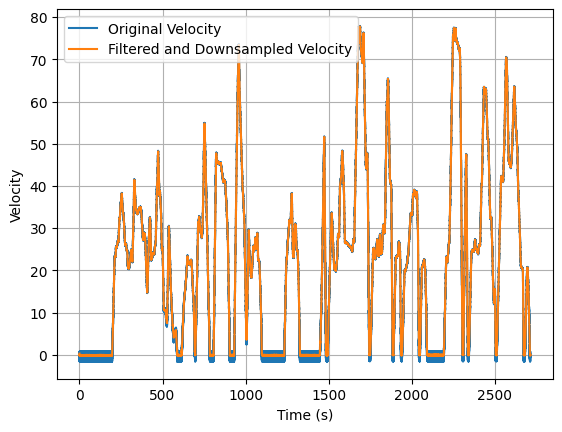

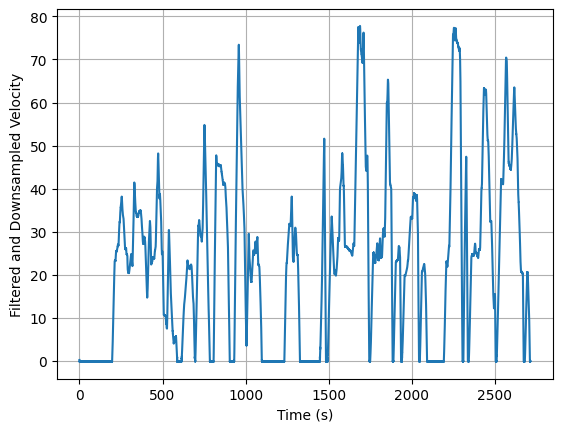

In [3]:
original_time_vector, downsampled_time_vector, velocity_data, downsampled_velocity = (
    generate_time_vector_for_dat1_file(
        data_px_ra_dat1,
        APPCFG.sampling_frequency_tvp,
        APPCFG.cutoff_frequency,
        APPCFG.new_sampling_frequency,
        3,
    )
)
plot_time_vectors_for_dat1_file(
    original_time_vector, downsampled_time_vector, velocity_data, downsampled_velocity
)

In [4]:
# original_time_vector to df
df_original_time_vector = pd.DataFrame(original_time_vector, columns=["time"])
df_downsampled_time_vector = pd.DataFrame(downsampled_time_vector, columns=["time"])
df_velocity_data = pd.DataFrame(velocity_data, columns=["velocity"])

In [5]:
df_original_time_vector.shape, df_downsampled_time_vector.shape, df_velocity_data.shape

((8681600, 1), (271300, 1), (8681600, 1))

In [6]:
display("df_original_time_vector", df_original_time_vector)
display("df_downsampled_time_vector", df_downsampled_time_vector)
display("df_velocity_data", df_velocity_data.head())

'df_original_time_vector'

,time
0,0.000313
1,0.000625
2,0.000937
3,0.001250
4,0.001563
...,...
8681595,2712.998750
8681596,2712.999063
8681597,2712.999375
8681598,2712.999688


'df_downsampled_time_vector'

,time
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
271295,2712.96
271296,2712.97
271297,2712.98
271298,2712.99


'df_velocity_data'

,velocity
0,0.2514
1,0.5059
2,-1.3904
3,0.2769
4,0.5823


# 2. f20_10_px_ra to calculate the short term Fourier transform (STFT) of the signal


[2024-07-29T09:43:16+0000] [INFO] [282] [utils] Number of samples: 271300
[2024-07-29T09:43:16+0000] [INFO] [286] [utils] Total time: [36072.   36072.01 36072.02 ... 38784.97 38784.98 38784.99]
[2024-07-29T09:43:16+0000] [INFO] [292] [utils] Window samples: 25
[2024-07-29T09:43:16+0000] [INFO] [300] [utils] Overlap: 23


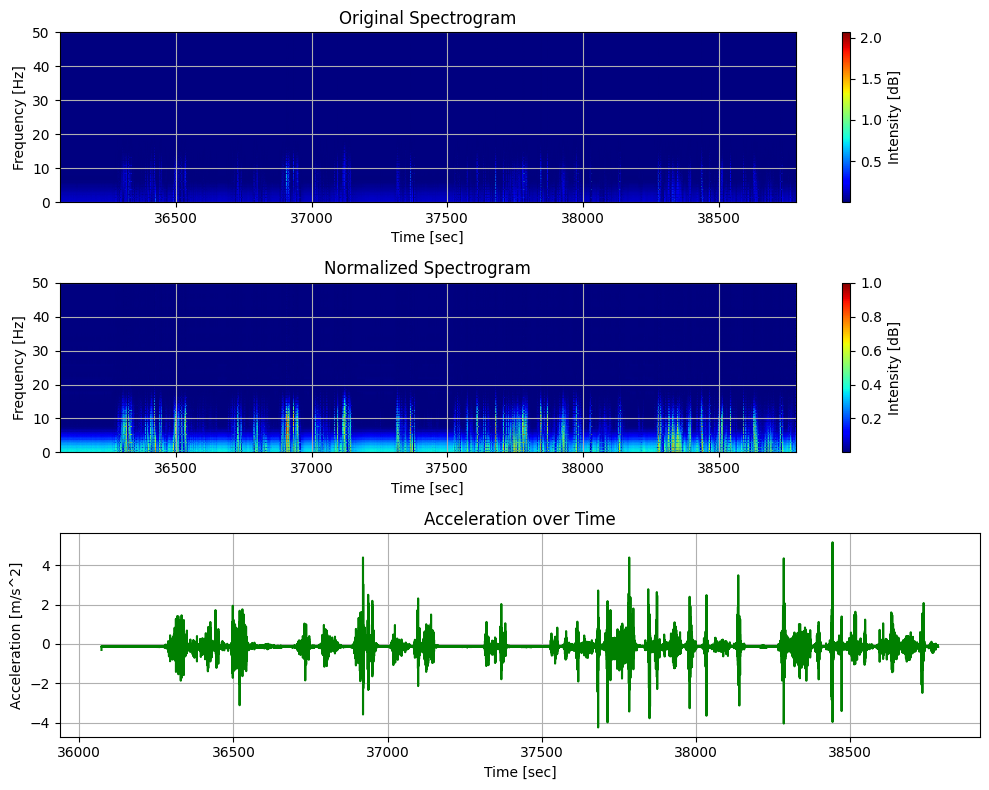

In [7]:
(
    data_f20_10_px_ra_mat,
    signal_acc_mat,
    time_column_mat,
    df_mat,
) = preprocess_mat_data(
    data_path=mat_px_ra,
    acel_to_process=APPCFG.acceleration_to_analyze,
    time_col_name="timestamp_s",
)

(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
) = short_term_fourier_transform_stft(
    signal_acc_mat,
    APPCFG.sampling_frequency_stft_prepared,
    APPCFG.window_length,
    APPCFG.overlap,
    APPCFG.gamma,
    time_column_mat,
    APPCFG.nfft_prepared,
)

plot_stft_results(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
    signal_acc_mat,
)

In [8]:
times = time_column_mat.values
print("times", times)
print("Min time", times[0])
print("Max time", times[-1])
num_samples = signal_acc_mat.shape[0]
print("num_samples", num_samples)
start_time = time_column_mat.iloc[0]
print("start_time", start_time)
total_time = np.arange(num_samples) / 100 + start_time
print("total_time", total_time)
print("Min time", total_time[0])
print("Max time", total_time[-1])

times [36072.   36072.01 36072.02 ... 38784.97 38784.98 38784.99]
Min time 36072.0
Max time 38784.99
num_samples 271300
start_time 36072.0
total_time [36072.   36072.01 36072.02 ... 38784.97 38784.98 38784.99]
Min time 36072.0
Max time 38784.99


## 3. Sample data for f20_10_px_ra


[2024-07-29T09:44:19+0000] [INFO] [282] [utils] Number of samples: 5001
[2024-07-29T09:44:19+0000] [INFO] [286] [utils] Total time: [36072.   36072.01 36072.02 ... 36121.98 36121.99 36122.  ]
[2024-07-29T09:44:19+0000] [INFO] [292] [utils] Window samples: 25
[2024-07-29T09:44:19+0000] [INFO] [300] [utils] Overlap: 23


(5001, 12)


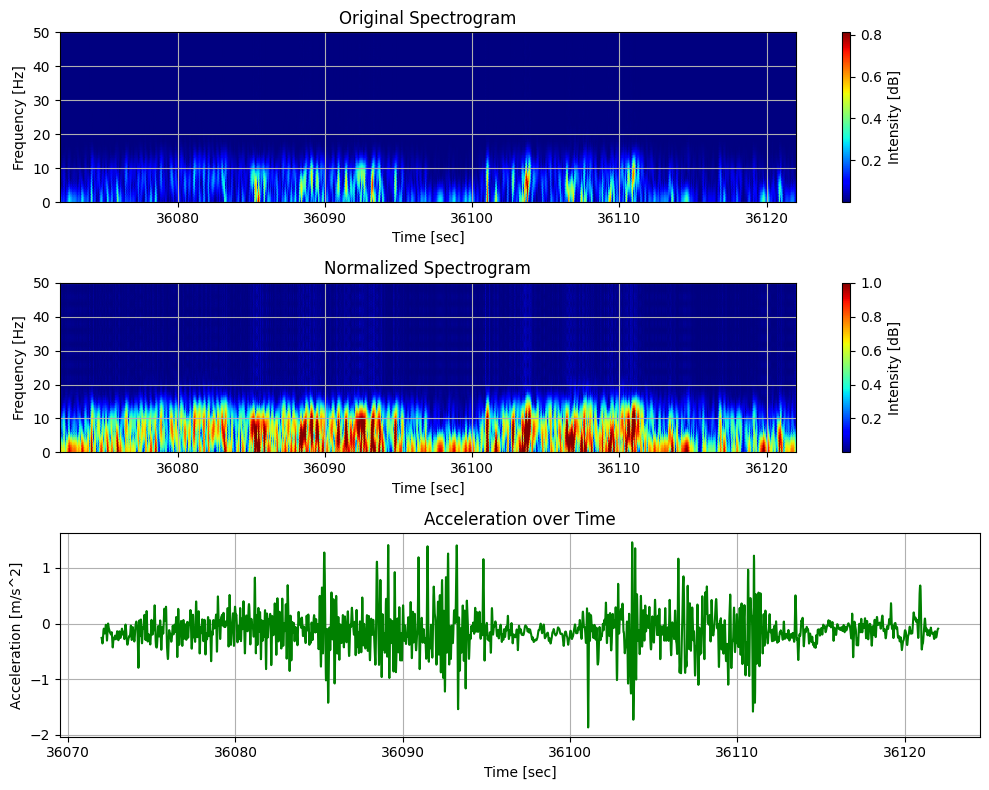

In [9]:
# Taking a sample of the data, from timestamp_s = 36300 to 36350
sample_data = df_mat[(time_column_mat >= 36300) & (time_column_mat <= 36350)]
print(sample_data.shape)

sample_signal_acc_mat = sample_data[APPCFG.acceleration_to_analyze]


(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
) = short_term_fourier_transform_stft(
    sample_signal_acc_mat,
    APPCFG.sampling_frequency_stft_prepared,
    APPCFG.window_length,
    APPCFG.overlap,
    APPCFG.gamma,
    time_column_mat,
    APPCFG.nfft_prepared,
)

plot_stft_results(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
    sample_signal_acc_mat,
)

In [10]:
times = time_column_mat.values
print("times", times)
print("Min time", times[0])
print("Max time", times[-1])
num_samples = signal_acc_mat.shape[0]
print("num_samples", num_samples)
start_time = time_column_mat.iloc[0]
print("start_time", start_time)
total_time = np.arange(num_samples) / 100 + start_time
print("total_time", total_time)
print("Min time", total_time[0])
print("Max time", total_time[-1])

times [36072.   36072.01 36072.02 ... 38784.97 38784.98 38784.99]
Min time 36072.0
Max time 38784.99
num_samples 271300
start_time 36072.0
total_time [36072.   36072.01 36072.02 ... 38784.97 38784.98 38784.99]
Min time 36072.0
Max time 38784.99


# 4. df_px_ra_dat1 to calculate the short term Fourier transform (STFT) of the signal


In [11]:
#  Adding df_original_time_vector to df_px_ra
df_px_ra_dat1["time"] = df_original_time_vector["time"]

The following cell does not run because the size of the dataset and the high value of overlap.


In [11]:
# (
#     frequencies_acc,
#     times_acc,
#     magnitude_spectrogram_acc,
#     X_prime_acc,
#     total_time_acc,
# ) = short_term_fourier_transform_stft(
#     signal_acc_dat1,
#     APPCFG.sampling_frequency_stft_raw,
#     APPCFG.window_length,
#     APPCFG.overlap,
#     APPCFG.gamma,
#     time_column=df_px_ra_dat1["time"],
#     nfft=APPCFG.nfft_raw,
# )

# plot_stft_results(
#     frequencies_acc,
#     times_acc,
#     magnitude_spectrogram_acc,
#     X_prime_acc,
#     total_time_acc,
#     signal_acc_dat1,
# )

In [12]:
# times = df_px_ra_dat1["time"].values
# print("times", times)
# print("Min time", times[0])
# print("Max time", times[-1])
# num_samples = signal_acc_dat1.shape[0]
# print("num_samples", num_samples)
# start_time = df_px_ra_dat1["time"].iloc[0]
# print("start_time", start_time)
# total_time = np.arange(num_samples) / 3200 + start_time
# print("total_time", total_time)
# print("Min time", total_time[0])
# print("Max time", total_time[-1])

## 5. Sample data for df_px_ra_dat1


[2024-07-29T09:45:00+0000] [INFO] [282] [utils] Number of samples: 112001
[2024-07-29T09:45:00+0000] [INFO] [286] [utils] Total time: [2250.        2250.0003125 2250.000625  ... 2284.999375  2284.9996875
 2285.       ]
[2024-07-29T09:45:00+0000] [INFO] [292] [utils] Window samples: 800
[2024-07-29T09:45:00+0000] [INFO] [300] [utils] Overlap: 760


(112001, 9)


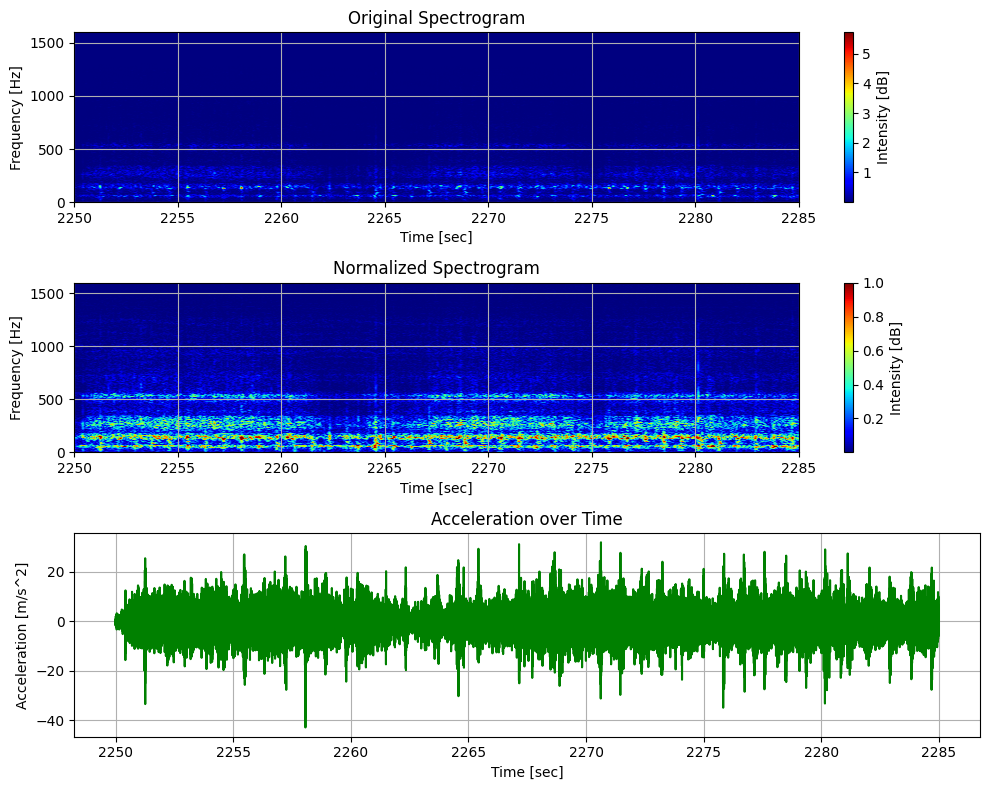

In [12]:
# Taking a sample of the data, from timestamp_s = 36300 to 36350
sample_data = df_px_ra_dat1[
    (df_px_ra_dat1["time"] >= 2250) & (df_px_ra_dat1["time"] <= 2285)
]
print(sample_data.shape)

sample_signal_acc_dat1 = sample_data[APPCFG.acceleration_to_analyze]
time_column_dat1 = sample_data["time"]


(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
) = short_term_fourier_transform_stft(
    sample_signal_acc_dat1,
    APPCFG.sampling_frequency_stft_raw,
    APPCFG.window_length,
    APPCFG.overlap,
    APPCFG.gamma,
    time_column_dat1,
    APPCFG.nfft_raw,
)

plot_stft_results(
    frequencies_acc,
    times_acc,
    magnitude_spectrogram_acc,
    X_prime_acc,
    total_time_acc,
    sample_signal_acc_dat1,
)